In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [6]:
data = pd.read_csv('data/1.03.+Dummies.csv')
new_data = data.copy()

In [13]:
new_data['Attendance'] = data['Attendance'].map({'No': 0, 'Yes': 1})

In [15]:
y1 = new_data['GPA']
x1 = new_data[['SAT','Attendance']]

In [16]:
x = sm.add_constant(x1)
result = sm.OLS(y1,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           2.19e-15
Time:                        21:03:01   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

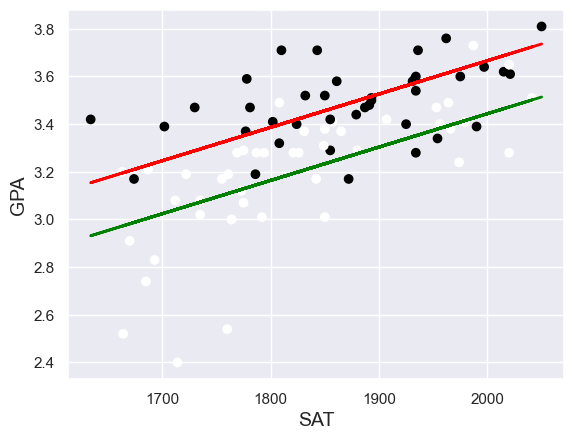

In [22]:
plt.scatter(new_data['SAT'], y1, c=new_data['Attendance'], cmap='CMRmap_r')
yhat_yes = 0.6439 + 0.0014*new_data['SAT'] + 0.2226*1
yhat_no = 0.6439 + 0.0014*new_data['SAT'] + 0.2226*0
fig = plt.plot(new_data['SAT'], yhat_yes, lw=2, c='red')
fig = plt.plot(new_data['SAT'], yhat_no, lw=2, c='green')
plt.xlabel('SAT', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.show()

In [24]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [27]:
prediction_data = pd.DataFrame({
    'const': 1,
    'SAT': [1700, 1670],
    'Attendance': [0, 1],
})
prediction_data = prediction_data[['const', 'SAT', 'Attendance']]
prediction_data.rename(index={0:'Bob', 1:'Alice'}, inplace=True)
prediction_data

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [29]:
predictions = result.predict(prediction_data)
data_with_predictions = prediction_data.copy()
data_with_predictions['Prediction'] = predictions
data_with_predictions

,const,SAT,Attendance,Prediction
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
